In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import seaborn as sns
import pickle

import src.metrics as metrics
import src.kernels as kernels
import src.bootstrap as boot
import src.exp_utils as exp_utils
import experiments.nf as nf_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Seed set to 42


Using device cpu
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:04<00:00, 2470955.48it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 368324.58it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 3484841.71it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 17837573.75it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Seed set to 42


In [218]:
samples_res = pickle.load(open("../data/nf/samples_res.pkl", "rb"))
scores_res = pickle.load(open("../data/nf/scores_res.pkl", "rb"))

In [219]:
scores_res[5.].shape

(3, 784)

In [226]:
ss = samples_res[5.][0]
ss = torch.tensor(ss.reshape([1, 1, 28, 28]), dtype=torch.float64).requires_grad_(True)
log_px = flow_model._get_likelihood(ss, return_ll=True)
log_px.backward()
grad_log_px = ss.grad.detach().numpy().reshape([1, 28**2])

gg = scores_res[5.][0]

print(np.allclose(grad_log_px, gg))

False


In [221]:
gg

array([-1.63435912e+00, -7.27953732e-01, -5.66502392e-01, -1.28071964e+00,
       -6.15881681e-01, -2.27037830e+01, -2.59067020e+01,  1.47285873e+02,
       -2.50929928e+01,  1.83902496e+02, -2.40778542e+01, -3.50008163e+01,
       -2.70649090e+01, -3.56064644e+01, -2.81138229e+01, -3.87921066e+01,
       -1.25992143e+00, -3.36757889e+01, -2.58436108e+01, -4.13030167e+01,
       -2.59001369e+01, -2.94358578e+01,  4.61087837e+01, -3.69864883e+01,
       -2.34267902e+01, -4.05659332e+01, -2.43858051e+01, -2.46120644e+01,
        1.56939313e-01, -2.00292636e-02,  3.73690426e-01, -8.47651809e-02,
        1.29358619e-01, -1.08112926e+01, -5.52713737e+01, -7.34531641e+00,
       -3.52323418e+01, -2.28310146e+01, -2.50636978e+01, -2.65410252e+01,
       -3.79056931e+01,  2.43168964e+01, -2.50997314e+01, -7.98819733e+00,
       -1.91448536e+01, -2.02958794e+01, -1.76184063e+01,  3.49340844e+00,
       -2.73763943e+01, -3.14777889e+01,  3.13722630e+01, -1.44404697e+01,
        2.87813416e+02, -

In [212]:
gg

array([-1.63435912e+00, -7.27953732e-01, -5.66502392e-01, -1.28071964e+00,
       -6.15881681e-01, -2.27037830e+01, -2.59067020e+01,  1.47285873e+02,
       -2.50929928e+01,  1.83902496e+02, -2.40778542e+01, -3.50008163e+01,
       -2.70649090e+01, -3.56064644e+01, -2.81138229e+01, -3.87921066e+01,
       -1.25992143e+00, -3.36757889e+01, -2.58436108e+01, -4.13030167e+01,
       -2.59001369e+01, -2.94358578e+01,  4.61087837e+01, -3.69864883e+01,
       -2.34267902e+01, -4.05659332e+01, -2.43858051e+01, -2.46120644e+01,
        1.56939313e-01, -2.00292636e-02,  3.73690426e-01, -8.47651809e-02,
        1.29358619e-01, -1.08112926e+01, -5.52713737e+01, -7.34531641e+00,
       -3.52323418e+01, -2.28310146e+01, -2.50636978e+01, -2.65410252e+01,
       -3.79056931e+01,  2.43168964e+01, -2.50997314e+01, -7.98819733e+00,
       -1.91448536e+01, -2.02958794e+01, -1.76184063e+01,  3.49340844e+00,
       -2.73763943e+01, -3.14777889e+01,  3.13722630e+01, -1.44404697e+01,
        2.87813416e+02, -

In [228]:
grad_log_px

array([[-1.65945756e+00, -7.60457218e-01, -3.14714849e-01,
        -2.68949509e+00, -2.12996006e+00,  8.24991989e+01,
        -2.27444038e+01,  1.20152435e+02, -2.35301018e+01,
        -3.56453819e+01, -2.84642353e+01, -2.84418716e+01,
        -2.05259762e+01, -2.35595703e+01, -2.85520382e+01,
        -2.73892574e+01, -2.23792572e+01,  4.06904488e+01,
        -2.38104038e+01, -3.80589561e+01, -2.51096916e+01,
         6.25553284e+01, -1.42705173e+01,  1.34398819e+02,
        -1.51885080e+01, -3.33577766e+01, -3.01672897e+01,
        -1.47614059e+01,  2.47536838e-01, -1.17415907e-02,
         3.63592297e-01, -7.48175755e-02,  1.30525947e-01,
        -1.31798763e+01, -4.43387566e+01, -3.45325813e+01,
        -3.72664871e+01, -2.03994656e+01, -4.32588310e+01,
        -2.10528889e+01, -3.98037186e+01,  5.20031691e+00,
         9.26136627e+01, -3.13165569e+01, -3.51080170e+01,
        -3.24680481e+01, -2.87148933e+01, -2.90717106e+01,
        -3.44408150e+01, -1.49494982e+01,  1.19609327e+0

In [211]:
grad_log_px

array([[-1.31774187e+00, -6.10866368e-01, -1.78693369e-01,
        -5.81925154e-01, -3.56113225e-01, -3.94478493e+01,
        -2.01207294e+01,  4.40199188e+02, -2.41298847e+01,
         1.70624985e+02,  5.43263550e+01, -1.73049374e+01,
        -1.97921429e+01, -2.86553478e+01, -2.20909252e+01,
         5.81550884e+00, -2.98598385e+01, -3.18936100e+01,
        -2.06554813e+01, -4.47615814e+01, -2.25664730e+01,
        -1.00404558e+01, -1.99210529e+01, -3.86245489e+00,
        -2.15992565e+01, -3.72775192e+01, -2.75406551e+01,
        -2.02716522e+01,  1.94136456e-01, -1.82477757e-04,
         2.89462507e-01, -7.56782293e-02,  1.15298390e-01,
        -3.02061772e+00, -4.29426651e+01, -2.50369301e+01,
        -4.35875664e+01, -1.66724377e+01,  4.83073006e+01,
        -2.96438179e+01, -3.05018806e+01,  9.15559006e+00,
         2.45175186e+02, -3.04296951e+01, -2.34440689e+01,
        -2.56326904e+01, -3.65511398e+01,  1.25517563e+02,
         1.85717831e+01, -2.91901817e+01, -1.28387432e+0

# Load

In [2]:
samples_res = pickle.load(open("../data/nf/samples_res.pkl", "rb"))
scores_res = pickle.load(open("../data/nf/scores_res.pkl", "rb"))

In [5]:
flow_model, _ = nf_utils.train_flow(nf_utils.create_multiscale_flow(), model_name="MNISTFlow_multiscale")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ma/x/xl6116/.envs/robust/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


Found pretrained model, loading...


In [29]:
samples_res[0.].shape

(1000, 784)

std: 0.0


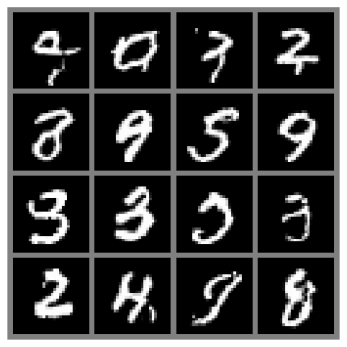

std: 1.0


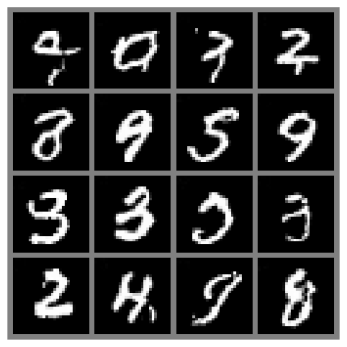

std: 5.0


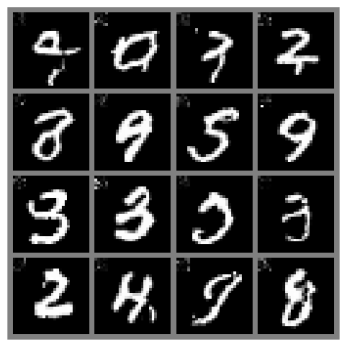

std: 10.0


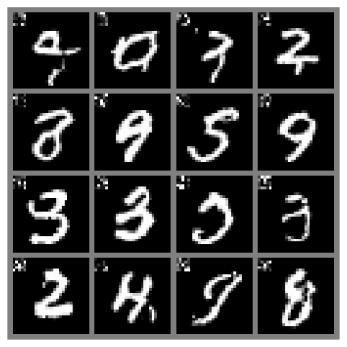

std: 20.0


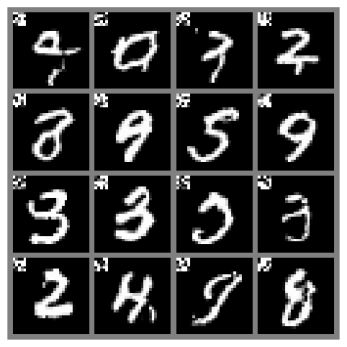

std: 50.0


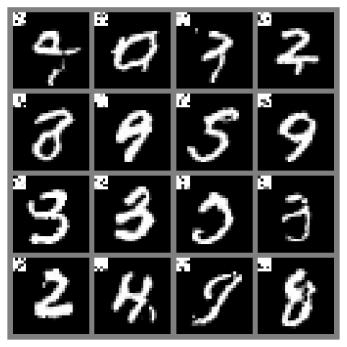

std: 100.0


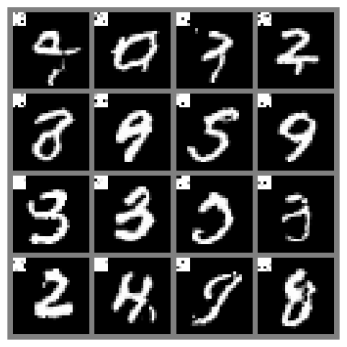

In [54]:
for std in samples_res.keys():
    print("std:", std)
    nf_utils.show_imgs(torch.tensor(samples_res[std][:16].reshape([-1, 1, 28, 28]), dtype=torch.int32))

# Test

In [55]:
n = 200
std = 20.
X = samples_res[std][:n]
scores_X = scores_res[std][:n]

score_weight_fn = kernels.PolyWeightFunction(loc=np.zeros_like(X[:1]))
kernel0 = kernels.RBF(sigma_sq=None, med_heuristic=True, X=X, Y=X)
kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)

ksd = metrics.KSD(kernel)
wild_boot = boot.WildBootstrap(ksd)
pval, stat, boot_stats = wild_boot.pval(X, X, return_stat=True, return_boot=True, scores=scores_X)

In [56]:
pval

Array(0.001998, dtype=float32, weak_type=True)